In [6]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')



In [7]:
df = pd.read_csv('/content/Tetuan City power consumption.csv')

In [8]:
df

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964
...,...,...,...,...,...,...,...,...,...
52411,12/30/2017 23:10,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212
52412,12/30/2017 23:20,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152
52413,12/30/2017 23:30,6.900,72.8,0.086,0.084,0.074,29590.87452,25277.69254,13806.48259
52414,12/30/2017 23:40,6.758,73.0,0.080,0.066,0.089,28958.17490,24692.23688,13512.60504


In [12]:
df['DateTime'] = pd.to_datetime(df['DateTime'])
df['Day'] = df['DateTime'].dt.day
df['Month'] = df['DateTime'].dt.month
df['Hour'] = df['DateTime'].dt.hour
df['Minute'] = df['DateTime'].dt.minute
df['Day of Week'] = df['DateTime'].dt.dayofweek + 1

In [13]:
df

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption,Day,Month,Hour,Minute,Day of Week
0,2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386,1,1,0,0,7
1,2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434,1,1,0,10,7
2,2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373,1,1,0,20,7
3,2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711,1,1,0,30,7
4,2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964,1,1,0,40,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52411,2017-12-30 23:10:00,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212,30,12,23,10,6
52412,2017-12-30 23:20:00,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152,30,12,23,20,6
52413,2017-12-30 23:30:00,6.900,72.8,0.086,0.084,0.074,29590.87452,25277.69254,13806.48259,30,12,23,30,6
52414,2017-12-30 23:40:00,6.758,73.0,0.080,0.066,0.089,28958.17490,24692.23688,13512.60504,30,12,23,40,6


<Axes: >

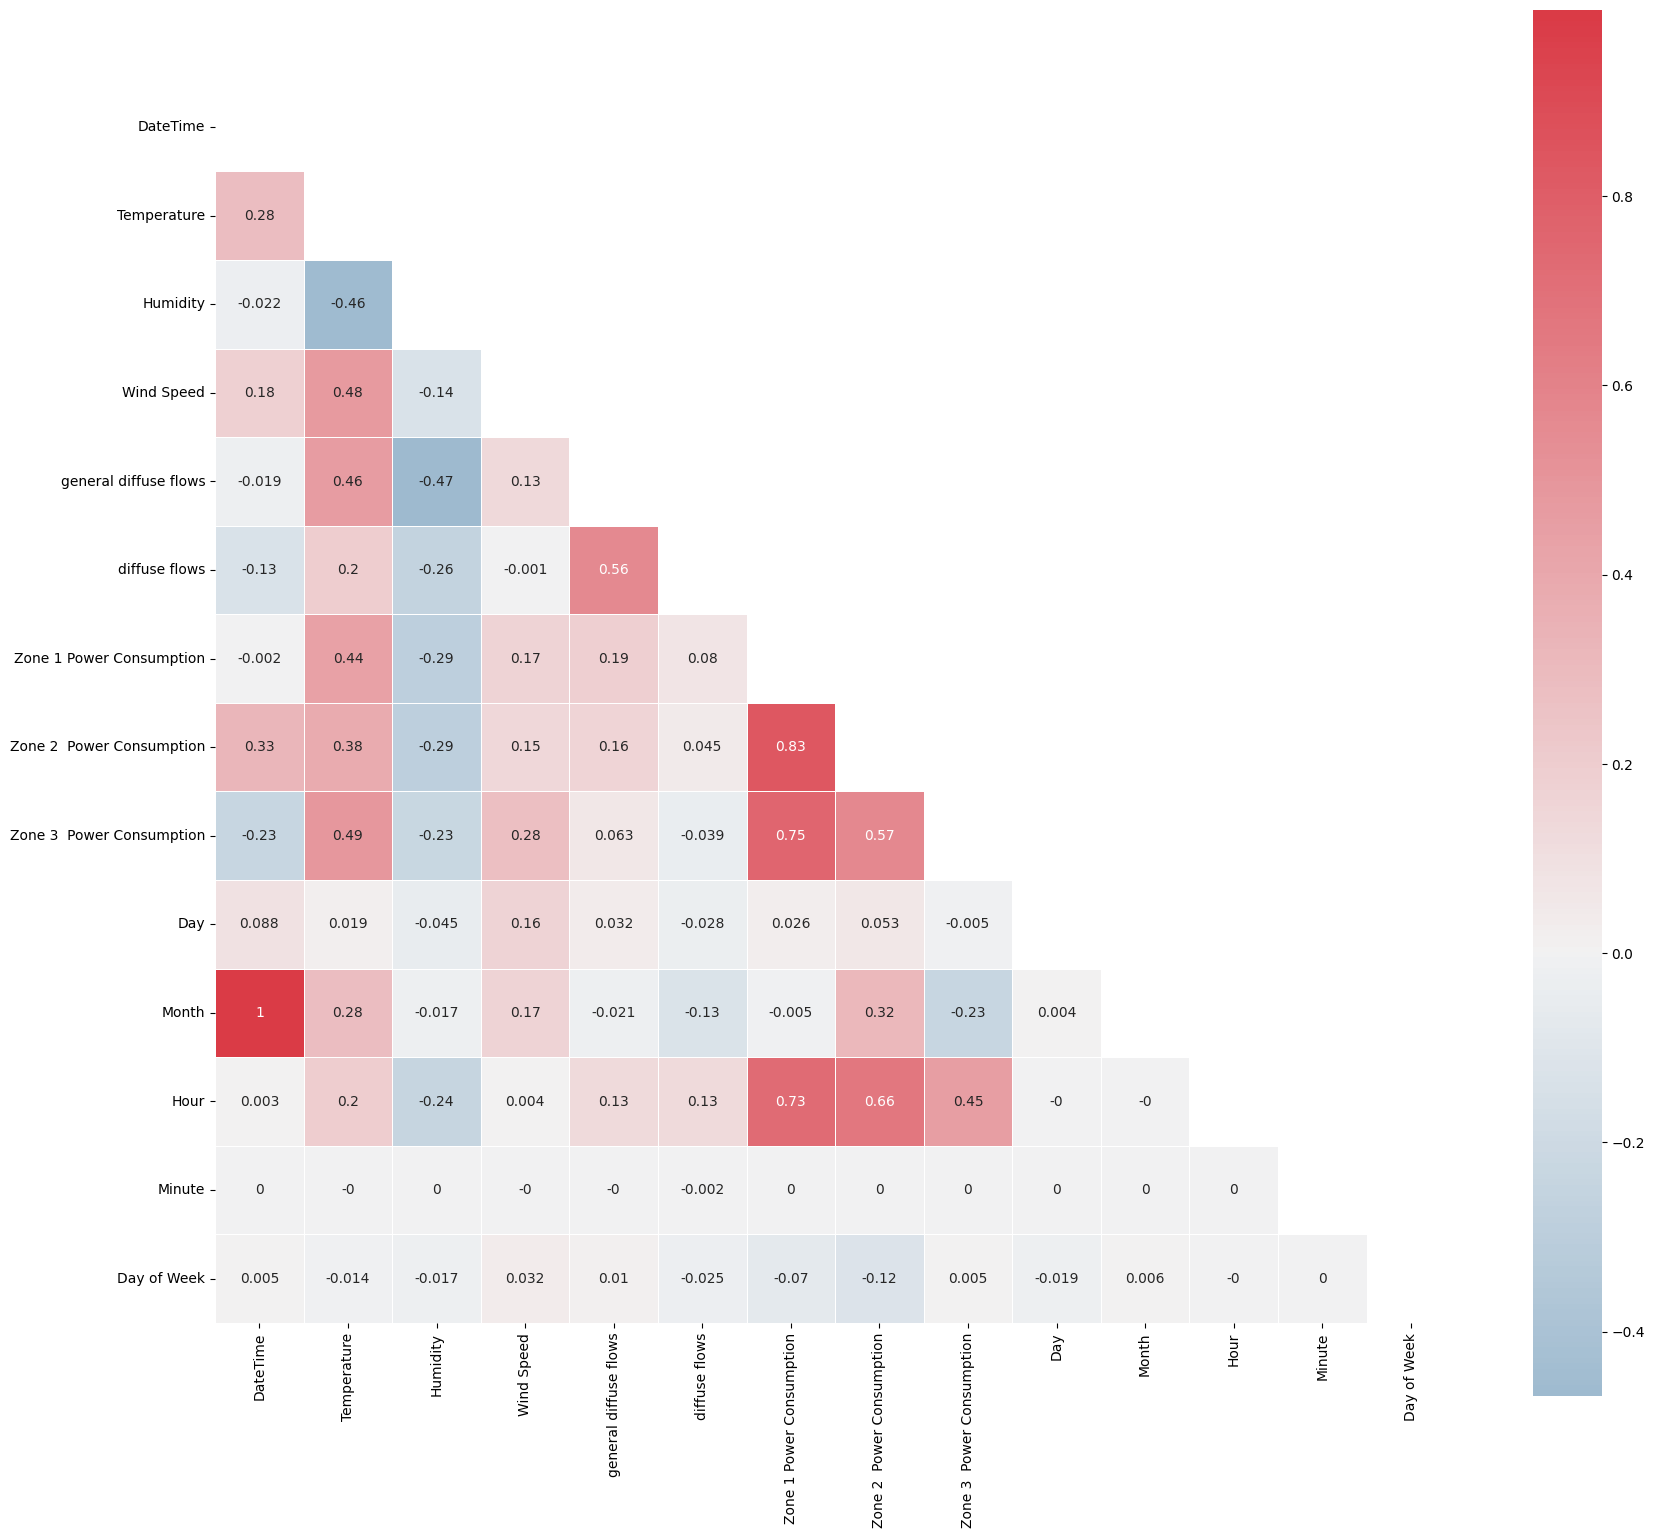

In [15]:
corr = df.corr().round(decimals=3)
mask = np.triu(np.ones_like(corr))
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(240, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=None, center=0,square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .9})


In [18]:
def month_to_quarter(series):
    if series['Month'] <=3:
        return 1
    elif series['Month'] >3 and series['Month'] <=6:
        return 2
    elif series['Month'] >6 and series['Month'] <=9:
        return 3
    elif series['Month'] >9 and series['Month'] <=12:
        return 4
df['Quarter of Year'] = df.apply(month_to_quarter, axis='columns')
df['Day of Year'] = df['DateTime'].dt.strftime('%j').astype(int)
df = df.drop(['DateTime'],axis=1)
df.columns


from sklearn.preprocessing import MinMaxScaler
# Initialiser l'objet MinMaxScaler
scaler = MinMaxScaler()

# Appliquer la méthode fit() sur l'objet scaler et la dataframe
scaler.fit(df)

# Appliquer la méthode transform() sur la dataframe
df_scaled = scaler.transform(df)
# Convertir le tableau numpy en dataframe
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

NameError: name 'Ytrain' is not defined

In [35]:
# prompt: split above df_scaled into testing and training data

from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_scaled, df, test_size=0.2, random_state=42)


In [36]:
# prompt: apply random forest over the above X_train, Ytrain, xtest ytest

from sklearn.ensemble import RandomForestRegressor

# Initialize the RandomForestRegressor model
model = RandomForestRegressor()

# Fit the model on the training set
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error:", mse)

Mean squared error: 4410.205736293725


In [48]:

from sklearn.metrics import r2_score

# Calculate the R^2 score
r2_score = r2_score(y_test, y_pred)

# Print the R^2 score
print("R^2 score:", r2_score*100)


R^2 score: 76.13493427910079


In [49]:
# prompt: can you apply XGBoost over the above X_test, y_test, X_train and y_train?

from xgboost import XGBRegressor

# Initialize the XGBoost model
model_xgb = XGBRegressor()

# Fit the model on the training set
model_xgb.fit(X_train, y_train)

# Predict on the test set
y_pred_xgb = model_xgb.predict(X_test)

# Evaluate the model
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
print("Mean squared error (XGBoost):", mse_xgb)




Mean squared error (XGBoost): 733.4673378506294


In [54]:
# Calculate the R^2 score
from sklearn.metrics import r2_score

r2_score_xgb = r2_score(y_test, y_pred_xgb)

# Print the R^2 score
print("R^2 score:", r2_score_xgb*100)

R^2 score: 99.98837851690398
